# Plotting alpha diversity metrics for Qiime2 bioreactor analysis

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [71]:
alpha_metrics_folders=os.listdir("alpha-metric-for-plot")
alpha_diversity=pd.DataFrame()
for folder in alpha_metrics_folders:
    file=pd.read_csv(filepath_or_buffer=f"./alpha-metric-for-plot/{folder}/alpha-diversity.tsv", delimiter="\t", header=None, skiprows=1)   
    file["alpha_metric"]=folder
    alpha_diversity = pd.concat([alpha_diversity, file], axis=0)
alpha_diversity.reset_index(drop=True,inplace=True)
alpha_diversity=alpha_diversity[alpha_diversity["alpha_metric"]!="observed_features"]

In [72]:
alpha_diversity[1]=alpha_diversity[1].apply(lambda x:round(x,2))
alpha_diversity

,0,1,alpha_metric
0,G1_1,6.64,shannon
1,G2_1,5.78,shannon
2,G3_1,6.13,shannon
3,G4_1,6.11,shannon
4,G5_1,6.85,shannon
5,G6_1,6.19,shannon
12,G1_1,0.97,simpson
13,G2_1,0.95,simpson
14,G3_1,0.96,simpson
15,G4_1,0.96,simpson


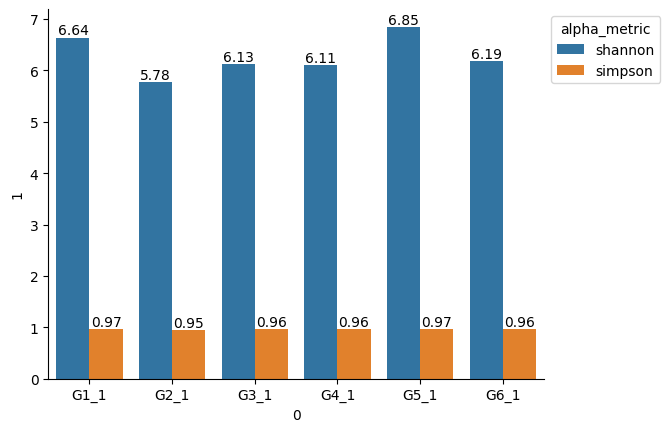

In [84]:
alpha_plot=sns.barplot(alpha_diversity, x=0, y=1, hue="alpha_metric", legend="brief")
alpha_plot.bar_label(alpha_plot.containers[0], fontsize=10)
alpha_plot.bar_label(alpha_plot.containers[1], fontsize=10)
sns.move_legend(alpha_plot, "upper left", bbox_to_anchor=(1, 1))
sns.despine()

In [74]:
for i in alpha_plot.containers[1]:
    print(i.get_height())

0.97
0.95
0.96
0.96
0.97
0.96
